In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 
from scipy.integrate import odeint

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
coltri = ["darkred", "skyblue", "orange"]

plt.rcParams['text.latex.preamble'] = r"""
    \usepackage[utf8]{inputenc}
    \usepackage{mathtools}
    \DeclarePairedDelimiter\braket{\langle}{\rangle}
    """

In [3]:
data = pd.read_csv('average_network_degree_by_province_20200321_allusers.csv',sep=',') 
data.head()

,Unnamed: 0,date,CR,LO,PC,BG,BS,PU,AO,RN,...,BT,CA,CE,AQ,SR,AG,CS,PA,TA,SU
0,0,2020-02-07,0.261868,0.301355,0.259885,0.386066,0.244493,0.204562,0.477614,0.282004,...,0.397691,0.305823,0.148371,0.148114,0.282201,0.175965,0.213432,0.501969,0.446288,0.118079
1,1,2020-02-08,0.392103,0.351264,0.321691,0.422912,0.297358,0.318823,0.430306,0.376406,...,0.402716,0.269005,0.174966,0.197693,0.234874,0.181547,0.232585,0.440796,0.380787,0.127859
2,2,2020-02-09,0.732007,0.233021,0.211343,0.481504,0.272724,0.368586,0.321464,0.523685,...,0.278137,0.255590,0.199755,0.130626,0.178081,0.132732,0.159012,0.333384,0.256775,0.105426
3,3,2020-02-10,0.255944,0.217943,0.243337,0.380477,0.215091,0.211072,0.505598,0.265253,...,0.358541,0.275442,0.153387,0.147016,0.250855,0.154742,0.171248,0.495611,0.335827,0.132458
4,4,2020-02-11,0.275818,0.239225,0.249625,0.385870,0.234331,0.254169,0.628011,0.230851,...,0.338833,0.308717,0.148056,0.154906,0.268974,0.165107,0.200436,0.502685,0.432393,0.106316


In [4]:
data[data.date =='2020-03-04'].to_numpy()[:]
# newcases_IT = np.flip(italy.Cases.to_numpy()[:lastxdays])

array([[26, '2020-03-04', 0.19376194512596945, 0.21434780450253246,
        0.18951774635806348, 0.3036101413365199, 0.19505968844622976,
        0.16667037548345634, 0.5586508918888095, 0.2057616855285448,
        0.2066106714716376, 0.31171604352051363, 0.2266399741058542,
        0.15786767150469658, 0.1366977407435928, 0.37892784666423773,
        0.3230631919134497, 0.2257048317330021, 0.7284510348281796,
        0.3212213875992293, 0.1768633198910856, 0.2126987564642624,
        0.2406337845494979, 0.5434834990007861, 0.2380956851225607,
        0.3760721056495757, 0.2337356922529529, 0.44432651879973295,
        0.207276057687254, 0.2737018437072319, 0.4682288177294948,
        0.2777944025094445, 0.1900134220279602, 0.13257410434106587,
        0.6962836049543055, 0.3662828153864393, 0.23720137147917586,
        0.21436527793847, 0.289235015528703, 0.2181899245522282,
        0.22307563941801847, 1.1480641930309587, 0.4350731167051058,
        0.19195124991133727, 0.25838394554

In [5]:
data.date

0     2020-02-07
1     2020-02-08
2     2020-02-09
3     2020-02-10
4     2020-02-11
5     2020-02-12
6     2020-02-13
7     2020-02-14
8     2020-02-15
9     2020-02-16
10    2020-02-17
11    2020-02-18
12    2020-02-19
13    2020-02-20
14    2020-02-21
15    2020-02-22
16    2020-02-23
17    2020-02-24
18    2020-02-25
19    2020-02-26
20    2020-02-27
21    2020-02-28
22    2020-02-29
23    2020-03-01
24    2020-03-02
25    2020-03-03
26    2020-03-04
27    2020-03-05
28    2020-03-06
29    2020-03-07
30    2020-03-08
31    2020-03-09
32    2020-03-10
33    2020-03-11
34    2020-03-12
35    2020-03-13
36    2020-03-14
37    2020-03-15
38    2020-03-16
39    2020-03-17
40    2020-03-18
41    2020-03-19
42    2020-03-20
43    2020-03-21
Name: date, dtype: object

In [6]:
kavseries = []
# for ii in data[data.date]:
for index, row in data.iterrows():
    kp = np.asarray(list(data[data.date == row['date']].to_numpy()))[0][2:]
#     print(row['date'],np.sum(kp)/len(kp))
    kavseries.append(np.sum(kp)/len(kp))
#     print(ii)
#     kp = np.asarray(list(data[data.date =='2020-03-04'].to_numpy()))[0][2:]
#     kav = np.sum(kp)
#     kav/len(kp)
kav = np.asarray(kavseries)
kav

array([0.34203097, 0.37603425, 0.31090984, 0.30570919, 0.3206087 ,
       0.32258513, 0.33155346, 0.35424541, 0.39016857, 0.33649963,
       0.31018679, 0.33440837, 0.32788498, 0.34142494, 0.35235691,
       0.37819268, 0.31677897, 0.29261728, 0.32290837, 0.2767471 ,
       0.29289615, 0.3221475 , 0.31909597, 0.22696933, 0.26192387,
       0.28846616, 0.29252952, 0.25611966, 0.2627805 , 0.25843561,
       0.16541468, 0.1917065 , 0.17198136, 0.1495115 , 0.1176707 ,
       0.11058572, 0.09507544, 0.07469871, 0.0981258 , 0.09321734,
       0.10084394, 0.09769498, 0.09498511, 0.08076668])

In [7]:
xdata,ydata = np.arange(1,len(kav)+1,1),kav
xdata,ydata

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 array([0.34203097, 0.37603425, 0.31090984, 0.30570919, 0.3206087 ,
        0.32258513, 0.33155346, 0.35424541, 0.39016857, 0.33649963,
        0.31018679, 0.33440837, 0.32788498, 0.34142494, 0.35235691,
        0.37819268, 0.31677897, 0.29261728, 0.32290837, 0.2767471 ,
        0.29289615, 0.3221475 , 0.31909597, 0.22696933, 0.26192387,
        0.28846616, 0.29252952, 0.25611966, 0.2627805 , 0.25843561,
        0.16541468, 0.1917065 , 0.17198136, 0.1495115 , 0.1176707 ,
        0.11058572, 0.09507544, 0.07469871, 0.0981258 , 0.09321734,
        0.10084394, 0.09769498, 0.09498511, 0.08076668]))

In [8]:
def kavexp(t, kav0, eta):
        return kav0*np.exp(-eta*t)
def kavpl(t, kav0, eta):
        return kav0/(1+eta*t)
    
func = kavexp
# func = kavpl
x0 = 0.3, 0.07

xdata,ydata = np.arange(1,len(kav)+1,1),kav

popt_kav, pcov_kav = curve_fit(func, xdata[26:]-27, ydata[26:], x0, maxfev = 5000)
popt_kav,pcov_kav

(array([0.29094093, 0.09096355]), array([[1.74376803e-04, 7.28379755e-05],
        [7.28379755e-05, 5.81649717e-05]]))

In [9]:
xdata[26:]-27

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [10]:
ydata[26:27][0]

0.2925295166487392

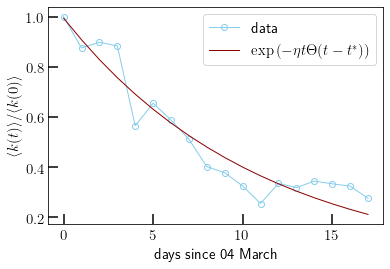

In [11]:
fig, ax = plt.subplots()
#     ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
#     plt.plot(np.arange(-10,100), func(np.arange(-10,100), *x0), '--',color='black', lw=2, label=r'fit:')
ax.plot(xdata[26:]-27,ydata[26:]/ydata[26:27][0], 'o-', color=coltri[1],mfc='none',  lw=1, label=r'data')
ax.plot(xdata[26:]-27, kavexp(xdata[26:]-27, *popt_kav)/ydata[26:27][0], '-',color=coltri[0], lw=1, label=r'$\exp\left(-\eta t \Theta(t-t^*)\right)$')
# ax.plot(xdata[26:]-27, kavpl(xdata[26:]-27, *popt_kav), '-',color='blue', lw=1, label=r'powerlaw')
ax.legend(loc=1,prop={'size':15},frameon=True)
ax.set_xlabel(r"days since 04 March", fontsize=15)
ax.set_ylabel(r"$\braket{k(t)}/\braket{k(0)}$", fontsize=15)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=15,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=15,direction='in')
# plt.ylim(0.1,3)
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# ax.set_yscale('log')
plt.show()

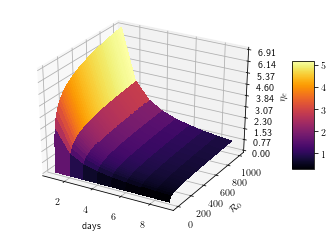

In [89]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
Y = np.arange(1, 10, 1)
X = np.arange(1, 1000, 1)
X, Y = np.meshgrid(X, Y)
Z = np.log(Y)/X

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.inferno,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('$\eta_c$')
ax.set_xlabel('days')
ax.set_ylabel('$\mathcal{R}_0$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


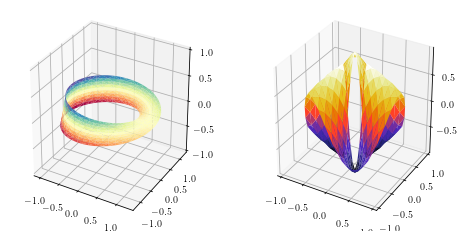

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri


fig = plt.figure(figsize=plt.figaspect(0.5))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()


In [8]:
data = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-03-26.csv',sep=';') 
data.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries,GeoId,CountryCode,Pop_Data.2018
0,26/03/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,25/03/2020,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,24/03/2020,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,23/03/2020,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,22/03/2020,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [9]:
# lastxdays = 17 #days since 08 march lockdown
lastxdays = 60 
italy = data[data.Countries =='Italy']
newcases_IT = np.flip(italy.Cases.to_numpy()[:lastxdays])
newcases_IT
# lastcumdays = 28
lastcumdays = 28
ydata_IT = np.cumsum(newcases_IT)[lastcumdays:]
xdata = np.arange(1,len(ydata_IT)+1,1)
xdata,ydata_IT

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 array([  132,   229,   322,   400,   650,   888,  1128,  1689,  1835,
         2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149, 12462,
        15113, 17660, 17750, 23980, 27980, 31506, 35713, 41035, 47021,
        53578, 59138, 63927, 69176, 74386]))

In [3]:
# kav = 1.5
kav = 1
R0 = 2.4
# mu = 1./13
mu = 1./4
beta = 1./5
kav = beta/R0/mu

R0, beta, mu, kav

(2.4, 0.2, 0.25, 0.33333333333333337)

In [4]:
N_IT = 60.48*10e6
N_KO = 51.47 *10e6
N_DE = 82.79*10e6

N=100*10e6
I0 = 10e-5*N

#fraction hospital care needed
q = 0.2
#max hospital capacity needed
c = 10e-4/q
c

0.005

In [5]:
import scipy.special as sc
from scipy.special import gamma

def asym_curve(t, I0, eta, mu, beta):
    return (I0/N)*np.exp(-(beta/eta)*(np.exp(-eta*t)-1)  - mu*t)

# def sym_curve(t, r0, I0, eta, mu, beta):
#     aa = mu/eta
#     gfactor =  gamma(aa*beta+1)*(sc.gammainc(aa*beta+1, (1+eta*t)*aa) - sc.gammainc(aa*beta+1, aa))
#     phi = np.exp(aa) / aa * gfactor
#     return r0 + (I0/N)*phi

def rtgamma(t, r0, rho0, R_0, eta):
    alpha = mu/eta
#     phi =  (sc.gammainc(alpha*R_0 + 1, alpha + mu*t) - sc.gammainc(alpha*R_0 + 1, alpha))
    phi =  gamma(alpha*R_0 + 1) * (sc.gammainc(alpha*R_0 + 1, alpha + mu*t) - sc.gammainc(alpha*R_0 + 1, alpha))
    return r0 + rho0*np.exp(alpha)/(alpha**(alpha*R_0)) * phi
#     return rho0*np.exp(alpha)/alpha*phi

    
def expI(t, a, b):
        return a*np.exp(b*t)

def expR(t, a, b, c):
    return a*np.exp(b*t) - c

def gumbel(t, rho0, eta):
    arg = -(np.exp(-eta*t) - 1)*mu*kav*R0/eta - mu*t
    return rho0*np.exp(arg)

def algebraic(t, rho0, R_0, eta):
    return rho0*(1+eta*t)**(mu*R_0/eta) * np.exp(- mu*t)

In [6]:
def tm(delta, mu, eta, R0):
    return 1./eta*(mu*(1-delta)*R0/(mu-delta*R0) - 1)

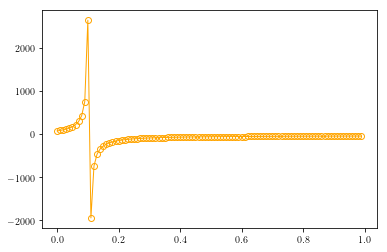

In [10]:
xdata = np.arange(0,1,0.01)
fig, ax1 = plt.subplots()
#     ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
#     plt.plot(np.arange(-10,100), func(np.arange(-10,100), *x0), '--',color='black', lw=2, label=r'fit:')
ax1.plot(xdata,tm(xdata, mu, 0.02, R0), 'o-', color=coltri[2],mfc='none',  lw=1, label=r'data')
plt.show()

In [10]:
xdata[:]+10

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

In [13]:
# func = gumbel
# func = algebraic
# x0 = 1000,0.01

func = rtgamma
# x0 = 500, 100, 2.4, 0.06
x0 = 229, 100, 3., .06


popt_IT, pcov_IT = curve_fit(func, xdata[:], ydata_IT[:], x0, maxfev = 5000)
popt_IT,pcov_IT

(array([6.08335043e+02, 4.08286491e+01, 3.30122119e+00, 6.33004746e-02]),
 array([[ 1.12826555e+05, -6.82873411e+03,  1.13919429e+02,
          3.72707721e+00],
        [-6.82873411e+03,  8.17717487e+02, -1.42797861e+01,
         -4.80420408e-01],
        [ 1.13919429e+02, -1.42797861e+01,  2.50753909e-01,
          8.46668833e-03],
        [ 3.72707721e+00, -4.80420408e-01,  8.46668833e-03,
          2.86554566e-04]]))

In [14]:
tM = (popt_IT[2]-1)/popt_IT[3]
tM


36.353932563122484

In [15]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


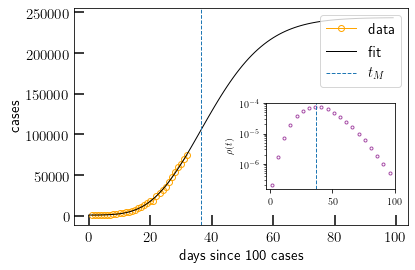

In [87]:
with plt.style.context('seaborn-colorblind'):
#     fig = plt.figure()
    fig, ax1 = plt.subplots()
#     ax = fig.add_subplot(111)
    # plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
    #plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
    # plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
#     plt.plot(np.arange(-10,100), func(np.arange(-10,100), *x0), '--',color='black', lw=2, label=r'fit:')
    ax1.plot(xdata,ydata_IT, 'o-', color=coltri[2],mfc='none',  lw=1, label=r'data')
    ax1.plot(np.arange(0,100), func(np.arange(0,100), *popt_IT), '-',color='black', lw=1, label=r'fit')
#     plt.plot(np.arange(1,100), func(np.arange(1,100), *popt_IT), '--',color='black', lw=2, label=r'fit: $\rho(0)(1+\eta t)^{\mu\mathcal{R}_0/\eta} e^{-\mu t}$')
    left, bottom, width, height = [0.57, 0.25, 0.3, 0.3]
    ax2 = fig.add_axes([left, bottom, width, height])
#     ax2.plot(range(6)[::-1], color='green')
    ax2.plot(np.arange(1,100,1)[::5], (algebraic(np.arange(1,100,1), popt_IT[1]+np.sqrt(pcov_IT[1][1]), popt_IT[2],popt_IT[3])/N_IT)[::5], 'o', alpha=0.7, lw=1, ms = 3,mfc='none', color='purple', label=r'$\rho(t)$')
    ax1.axvline(tM, ls='--', lw=1, label='$t_M$')
    ax2.axvline(tM, ls='--', lw=1, label='$t_M$')
    ax1.legend(loc=1,prop={'size':15},frameon=True)
    ax1.set_xlabel(r"days since 100 cases", fontsize=15)
#     ax2.set_xlabel(r"days since 100 cases", fontsize=15)
    ax1.set_ylabel(r"cases", fontsize=15)
    ax2.set_ylabel(r"$\rho(t)$", fontsize=10)
    ax1.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=15,direction='in')
    ax1.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=15,direction='in')
    #plt.xticks(fontsize = 20)
    #plt.yticks(fontsize = 20)
    ax2.set_yscale('log')
#     ax1.set_yscale('log')
#     plt.grid(True)
    # plt.xscale('log')
#     plt.title('ITALY',fontsize = 20)
plt.show()

In [40]:
lastxdays = 56 #days since 08 march lockdown
korea = data[data.Countries =='South_Korea']
newcases_KO = np.flip(korea.Cases.to_numpy()[:lastxdays])
ydata_KO = np.cumsum(newcases_KO)
xdata = np.arange(1,len(ydata_KO)+1,1)
xdata,ydata_KO

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56]),
 array([   3,    8,   11,   11,   12,   14,   19,   20,   20,   21,   23,
          24,   24,   24,   24,   24,   25,   26,   27,   42,   76,  151,
         341,  597,  758,  888, 1142, 1591, 2018, 2927, 3522, 4208, 4808,
        5324, 5762, 6280, 6763, 7130, 7378, 7509, 7751, 7865, 7975, 8082,
        8158, 8232, 8316, 8409, 8561, 8648, 8795, 8893, 8957, 9033, 9133,
        9237]))

In [41]:
# func = gumbel
# # func = algebraic
# x0 = 1000,0.01

func = rtgamma
# x0 = 500, 100, 2.4, 0.06
x0 = 100, 900, 1.4, .02


popt_KO, pcov_KO = curve_fit(func, xdata[:], ydata_KO[:], x0,maxfev = 5000)
popt_KO,pcov_KO

(array([6.69502048e+01, 2.00568043e-02]),
 array([[4.66646059e+01, 4.01730232e-03],
        [4.01730232e-03, 3.65400121e-07]]))

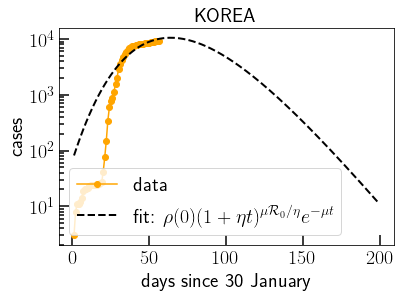

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_KO, 'o-', color=coltri[2],  label=r'data')
# plt.plot(np.arange(1,100), func(np.arange(1,100), *popt_IT), '--',color='black', lw=2, label=r'fit: $\rho(0)e^{-(e^{-\eta t}-1)\mu\mathcal{R}_0/\eta - \mu t}$')
plt.plot(np.arange(1,200), func(np.arange(1,200), *popt_KO), '--',color='black', lw=2, label=r'fit: $\rho(0)(1+\eta t)^{\mu\mathcal{R}_0/\eta} e^{-\mu t}$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 30 January", fontsize=20)
plt.ylabel(r"cases", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('KOREA',fontsize = 20)
plt.show()

In [28]:
tM1 = np.log(R0*kav)/popt_IT[1]
tM1

63.10892516763837

In [37]:
tM2 = (R0*kav - 1)/popt_IT[1]
tM2

128.09654926142647

In [29]:
1./popt_IT[1]

49.267903562087106

In [87]:
(0.1/mu + 1)/R0

0.9583333333333333

In [8]:
N,R0

(1000000000.0, 2.4)

In [205]:
popt_IT[2]

3.181761713552661

In [9]:
eta = .014
eta = .02
# eta = popt_IT[3]

tstar = 1
# gamma = betaA/eta
# beta, 1./mu, 1./muA, gamma 

def SIRexp(y, t, N, eta, tstar, mu, beta):
    S, I = y
    dSdt = -beta*np.exp(-eta*t*np.heaviside(t-tstar,1))*S*I/N 
    dIdt = beta*np.exp(-eta*t*np.heaviside(t-tstar,1))*S*I/N - mu*I 
    return dSdt, dIdt
# def SIR(y, t, N, mu, beta):
#     S, I = y
#     dSdt = -beta*S*I/N 
#     dIdt = beta*S*I/N - mu*I 
#     return dSdt, dIdt

t = np.arange(1,300,1)
S0 = N - I0
y0 = S0, I0
ret = odeint(SIRexp, y0, t, args=(N, eta, tstar, mu, mu*R0))
S_t, I_t = ret.T
R_t = N - S_t - I_t
# I_t/N

In [11]:
t = np.arange(1,100)

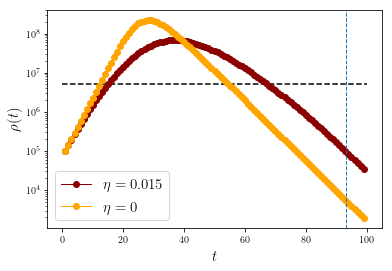

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.plot(t[::ls], (I_t/N)[::ls], '-', alpha=0.7, lw=1, color='blue', label='$I$',mfc='none')
# ax1.plot(t[::ls], (np.append(np.diff(R_t),0)/N)[::ls], '-', alpha=0.7, lw=1, color='red', label='$R$',mfc='none')
ret = odeint(SIRexp, y0, t, args=(N, 0.015, tstar, mu, mu*R0))
S_t, I_t = ret.T
R_t = N - S_t - I_t
plt.plot(t, I_t, '-o',color=coltri[0], lw=1, label=r'$\eta=0.015$')
# ret = odeint(SIRexp, y0, t, args=(N, 0.066, tstar, mu, mu*R0))
# S_t, I_t = ret.T
# R_t = N - S_t - I_t
# plt.plot(t, I_t, '-o',color='green', lw=1, label=r'$\eta=0.066$')
# ret = odeint(SIRexp, y0, t, args=(N, 0.074, tstar, mu, mu*R0))
# S_t, I_t = ret.T
# R_t = N - S_t - I_t
# plt.plot(t, I_t, '-o',color=coltri[1], lw=1, label=r'$\eta=0.074$')
ret = odeint(SIRexp, y0, t, args=(N, 0, tstar, mu, mu*R0))
S_t, I_t = ret.T
R_t = N - S_t - I_t
plt.plot(t, I_t, '-o',color=coltri[2], lw=1, label=r'$\eta=0$')
plt.legend(loc='best',prop={'size':15},frameon=True)
plt.hlines(c*N, 0, 100, colors='k', linestyles='--', label='critical')
tM = (R0-1)/0.015
ax1.axvline(tM, ls='--', lw=1, label='$t_M$')

ax1.set_ylabel(r'$\rho(t)$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
plt.yscale('log')
plt.show()

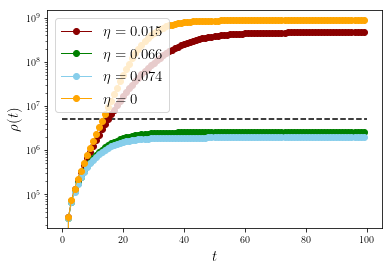

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.plot(t[::ls], (I_t/N)[::ls], '-', alpha=0.7, lw=1, color='blue', label='$I$',mfc='none')
# ax1.plot(t[::ls], (np.append(np.diff(R_t),0)/N)[::ls], '-', alpha=0.7, lw=1, color='red', label='$R$',mfc='none')
ret = odeint(SIRexp, y0, t, args=(N, 0.015, tstar, mu, mu*R0))
S_t, I_t = ret.T
R_t = N - S_t - I_t
plt.plot(t, R_t, '-o',color=coltri[0], lw=1, label=r'$\eta=0.015$')
ret = odeint(SIRexp, y0, t, args=(N, 0.066, tstar, mu, mu*R0))
S_t, I_t = ret.T
R_t = N - S_t - I_t
plt.plot(t, R_t, '-o',color='green', lw=1, label=r'$\eta=0.066$')
ret = odeint(SIRexp, y0, t, args=(N, 0.074, tstar, mu, mu*R0))
S_t, I_t = ret.T
R_t = N - S_t - I_t
plt.plot(t, R_t, '-o',color=coltri[1], lw=1, label=r'$\eta=0.074$')
ret = odeint(SIRexp, y0, t, args=(N, 0, tstar, mu, mu*R0))
S_t, I_t = ret.T
R_t = N - S_t - I_t
plt.plot(t, R_t, '-o',color=coltri[2], lw=1, label=r'$\eta=0$')
plt.legend(loc='best',prop={'size':15},frameon=True)
plt.hlines(c*N, 0, 100, colors='k', linestyles='--', label='critical')

ax1.set_ylabel(r'$\rho(t)$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
plt.yscale('log')
plt.show()

In [21]:
mu * (-np.log(R0) + R0 -1) / np.log(c/(I0/N))

0.03352046127529697

In [10]:
I0/N, eta, mu, beta, beta/eta, mu/eta

(0.0001, 0.02, 0.25, 0.2, 10.0, 12.5)

In [195]:
# rho0, eta, r0, k = 3.44042272e+04, , 2.83619524e-01, 2.48108109e+04, 1.14248816e+00

In [196]:
popt_IT

array([7.09055230e+02, 6.32642039e+01, 3.18176171e+00, 6.21650437e-02])

In [197]:
popt_IT[1],np.sqrt(pcov_IT[1][1])

(63.26420392148584, 40.64205244740697)

In [224]:
3.1817/2.4

1.3257083333333335

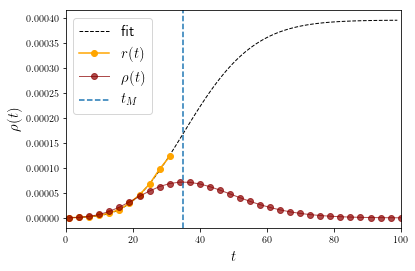

In [252]:
ls = 3
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=True, figsize=(12,3))
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.plot(t[::ls], (I_t/N)[::ls], '-', alpha=0.7, lw=1, color='blue', label='$I$',mfc='none')
# ax1.plot(t[::ls], (np.append(np.diff(R_t),0)/N)[::ls], '-', alpha=0.7, lw=1, color='red', label='$R$',mfc='none')
plt.plot(np.arange(5,100), func(np.arange(5,100), *popt_IT)/N_IT, '--',color='black', lw=1, label=r'fit')

plt.plot(xdata[::ls],ydata_IT[::ls]/N_IT, 'o-', color=coltri[2],  label=r'$r(t)$')
ax1.plot(np.arange(1,300,1)[::ls], (algebraic(np.arange(1,300,1), popt_IT[1]+np.sqrt(pcov_IT[1][1]), popt_IT[2],popt_IT[3])/N_IT)[::ls], '-o', alpha=0.7, lw=1, color=coltri[0], label=r'$\rho(t)$')
# ax1.plot(t[::ls], sym_curve(t, 2.48108109e+04/N_IT, 3.44042272e+04/N_IT, 2.83619524e-01, 1./4, R0*1.14248816e+00)[::ls], '-s', alpha=0.7, lw=1, color='violet', label='$R^{theo}$',mfc='none')

# ax1.plot(t[::ls], (A/(p*N))[::ls], '-o', alpha=0.7, lw=1, color=coltri[0], label='$A$',mfc='none')
# ax1.plot(t[::ls], (S/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[1], label='$S$',mfc='none')
# ax1.plot(t[::ls], (R/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[2], label='$R$',mfc='none')
# ax1.plot(t[::ls], (I/((1-p)*N))[::ls], '-s', alpha=0.7, lw=1, color='blue', label='$I$',mfc='none')
plt.axvline(tM, ls='--', label='$t_M$')
# plt.axvline(np.argmax(I_t/N), label='$t_M$')
# plt.axvline(np.argmax(np.append(np.diff(R_t),0)), label='$t_M$')

plt.legend(loc='best',prop={'size':15},frameon=True)

ax1.set_ylabel(r'$\rho(t)$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
plt.xlim(0,100)
# plt.yscale('log')
# plt.xscale('log')
# ax2.set_xlabel(r'$t$')
# ax3.set_xlabel(r'$t$')
plt.show()

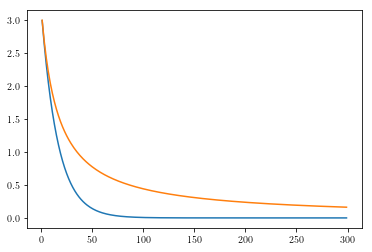

In [223]:
plt.plot(t,popt_IT[2]*np.exp(-eta*t))
plt.plot(t,popt_IT[2]/(1+eta*t))
plt.show()

In [189]:
tM

35.096278953539866

In [142]:
asym_curve(t, I0, eta, mu, beta)/(I_t/N)

array([ 1.41063478e+00,  1.41064568e+00,  1.41066287e+00,  1.41068836e+00,
        1.41072461e+00,  1.41077475e+00,  1.41084256e+00,  1.41093270e+00,
        1.41105074e+00,  1.41120326e+00,  1.41139800e+00,  1.41164394e+00,
        1.41195136e+00,  1.41233187e+00,  1.41279854e+00,  1.41336577e+00,
        1.41404937e+00,  1.41486643e+00,  1.41583521e+00,  1.41697501e+00,
        1.41830598e+00,  1.41984889e+00,  1.42162484e+00,  1.42365504e+00,
        1.42596043e+00,  1.42856141e+00,  1.43147750e+00,  1.43472700e+00,
        1.43832670e+00,  1.44229157e+00,  1.44663451e+00,  1.45136612e+00,
        1.45649451e+00,  1.46202516e+00,  1.46796082e+00,  1.47430147e+00,
        1.48104431e+00,  1.48818384e+00,  1.49571191e+00,  1.50361789e+00,
        1.51188887e+00,  1.52050974e+00,  1.52946358e+00,  1.53873177e+00,
        1.54829434e+00,  1.55813019e+00,  1.56821735e+00,  1.57853327e+00,
        1.58905504e+00,  1.59975967e+00,  1.61062426e+00,  1.62162618e+00,
        1.63274342e+00,  

In [22]:
np.log(R0*kav)/eta

NameError: name 'eta' is not defined

In [59]:
r0, rho0, R_0, eta = popt_IT[0], popt_IT[1], popt_IT[2], popt_IT[3]
eta

0.06330047464691936

In [43]:
mu=1./4

In [44]:
mu, c, I0/N

(0.25, 0.005, 0.0001)

In [19]:
R_0 = 2.4
I0/N

0.0001

In [20]:
etac = mu * (-np.log(R_0) + R_0 -1) / np.log(c/(I0/N))
etac

0.03352046127529697

In [47]:
etarange = np.arange(0.01,0.10,0.01)
etarange

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [49]:
labe = []
for eta in etarange:
    labe.append(r'$\eta=$ ' + str(round(eta,3)))
labe   

['$\\eta=$ 0.01',
 '$\\eta=$ 0.02',
 '$\\eta=$ 0.03',
 '$\\eta=$ 0.04',
 '$\\eta=$ 0.05',
 '$\\eta=$ 0.06',
 '$\\eta=$ 0.07',
 '$\\eta=$ 0.08',
 '$\\eta=$ 0.09']

In [88]:
N,I0/N

(1000000000.0, 0.0001)

In [16]:
def gumbelexp(t, rho0, R_0, eta):
    return rho0*np.exp(-(mu*R_0/eta)*(np.exp(-eta*t)-1)  - mu*t)
def algebraic(t, rho0, R_0, eta):
    return rho0*(1+eta*t)**(mu*R_0/eta) * np.exp(- mu*t)

def SIRexp(y, t, N, eta, tstar, mu, beta):
    S, I = y
    dSdt = -beta*np.exp(-eta*t*np.heaviside(t-tstar,1))*S*I/N 
    dIdt = beta*np.exp(-eta*t*np.heaviside(t-tstar,1))*S*I/N - mu*I 
    return dSdt, dIdt
def SIRpl(y, t, N, eta, tstar, mu, beta):
    S, I = y
    dSdt = -beta*(1+eta*t*np.heaviside(t-tstar,1))**(-1) *S*I/N 
    dIdt = beta*(1+eta*t*np.heaviside(t-tstar,1))**(-1) *S*I/N - mu*I 
    return dSdt, dIdt
t = np.arange(1,300,1)
S0 = N - I0
y0 = S0, I0
# retexp = odeint(SIRexp, y0, t, args=(N, eta, tstar, mu, mu*R_0))
# S_expt, I_expt = retexp.T
# R_expt = N - S_expt - I_expt
# # I_t/N

In [53]:
inflistexp = []

for eta in etarange:
    ret = odeint(SIRexp, y0, t, args=(N, eta, 1, mu, mu*(R_0)))
    S_t, I_t = ret.T
    inflistexp.append(I_t/N)
    R_t = N - S_t - I_t
    
infarrayexp = np.asarray(inflistexp) 
# labe = ['$\eta=0.03$','$\eta=0.04$', '$\eta=0.05$', '$\eta=0.06$', '$\eta=0.07$', '$\eta=0.08$', '$\eta=0.09$', '$\eta=0.10$']

In [22]:
I0/N,etac,mu,beta

(0.0001, 0.03352046127529697, 0.25, 0.2)

In [28]:
y0,t

((999900000.0, 100000.0),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 17

In [31]:
y0

(999900000.0, 100000.0)

In [33]:
SIRpl(y0, t, N, etac, 1, mu, beta)

(array([-19349.39921298, -18741.54924836, -18170.72658908, -17633.64794735,
        -17127.40707241, -16649.4221395 , -16197.39170916, -15769.25767115,
        -15363.17391381, -14977.47971284, -14610.67703037, -14261.41106997,
        -13928.45355556, -13610.68829914, -13307.09870007, -13016.75688077,
        -12738.81421438, -12472.49304052, -12217.07939904, -11971.91663854,
        -11736.39977937, -11509.97052915, -11292.11286434, -11082.34910427,
        -10880.23641479, -10685.36368767, -10497.34874936, -10315.83585944,
        -10140.49346415,  -9971.01217519,  -9807.10294784,  -9648.49543596,
         -9494.936504  ,  -9346.18887888,  -9202.02992664,  -9062.25054066,
         -8926.65412953,  -8795.05569462,  -8667.28098796,  -8543.16574246,
         -8422.55496741,  -8305.30230277,  -8191.26942667,  -8080.32551106,
         -7972.34672098,  -7867.21575352,  -7764.82141271,  -7665.05821718,
         -7567.82603777,  -7473.02976226,  -7380.57898505,  -7290.38771963,
         -72

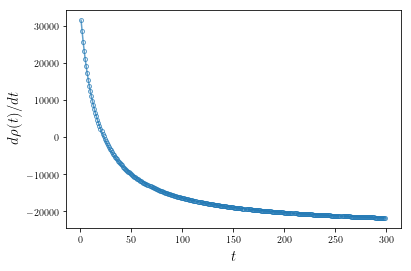

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t, SIRpl(y0, t, N, 0.06, 1, mu, R_0*mu)[1], '-o', alpha=0.7, lw=1.5, ms=4, mfc='none',label='$drho$')
# plt.legend(loc='best',prop={'size':15},frameon=True)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size':15},frameon=True)

ax1.set_ylabel(r'$d\rho(t)/dt$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
# plt.xlim(0,100)
# plt.ylim(0.0001,0.5)
# plt.yscale('log')
# plt.xscale('log')
# ax2.set_xlabel(r'$t$')
# ax3.set_xlabel(r'$t$')
plt.show()

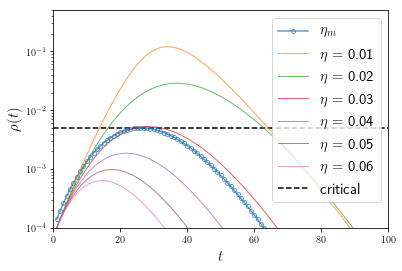

In [67]:
ls = 1


# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=True, figsize=(12,3))
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.plot(t[::ls], (A/N)[::ls], '-o', alpha=0.7, lw=1, color=coltri[0], label='$A$',mfc='none')
# ax1.plot(t[::ls], (S/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[1], label='$S$',mfc='none')
# ax1.plot(t[::ls], (R/N)[::ls], '-', alpha=0.7, lw=1, color=coltri[2], label='$R$',mfc='none')
# ax1.plot(t[::ls], (I/N)[::ls], '-', alpha=0.7, lw=1, color='blue', label='$\eta=0$',mfc='none')
# ax1.plot(t[::ls], (I_t/N)[::ls], '-s', alpha=0.7, lw=1, color=coltri[1], label='',mfc='none')
ax1.plot(t[::ls], gumbelexp(t, I0/N, R_0, etac), '-o', alpha=0.7, lw=1.5, ms=4, mfc='none',label='$\eta_m$')

for ii in range(len(etarange)-3):
    ax1.plot(t[::ls], infarrayexp[ii][::ls], '-', alpha=0.7, lw=1, label=labe[ii],mfc='none')

#     ax1.plot(t[::ls], gumbelexp(t, I0, R_0, etarange[ii]), '-o', alpha=0.7, lw=1.5, ms=4, mfc='none',label=labe[ii])
#     ax1.plot(t[::ls], algebraic(t, I0/N, 1.*R_0, etarange[ii]), '-o', alpha=0.7, lw=1.5, ms=4, mfc='none',label=labe[ii])
    
plt.hlines(c, 0, 100, colors='k', linestyles='--', label='critical')

plt.legend(loc='best',prop={'size':15},frameon=True)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size':15},frameon=True)

ax1.set_ylabel(r'$\rho(t)$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
plt.xlim(0,100)
plt.ylim(0.0001,0.5)
plt.yscale('log')
# plt.xscale('log')
# ax2.set_xlabel(r'$t$')
# ax3.set_xlabel(r'$t$')
plt.show()

In [84]:
R_0, mu, etarange

(2.4, 0.25, array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]))

In [155]:
c*N

5000000.0

In [95]:
R0*kav

2.4

In [82]:
import matplotlib

norm = matplotlib.colors.Normalize(vmin=10.0, vmax=20.0)

print(norm(15.0)) # 0.5

cmap=plt.cm.get_cmap('magma')
cmap=plt.cm.get_cmap('viridis')
cmap=plt.cm.get_cmap('inferno')

# Accessing three values from the Pastel1 colormap
colo = plt.cm.get_cmap('viridis', len(etarange)-1).colors
colo

0.5


array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ],
       [0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ],
       [0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ],
       [0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

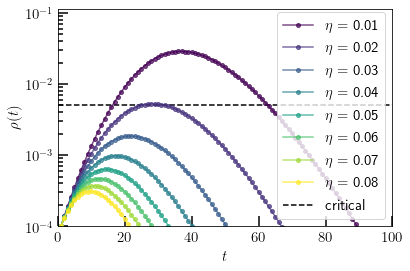

In [86]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.plot(t[::ls], (I_t/N)[::ls], '-s', alpha=0.7, lw=1, color=coltri[1], label='',mfc='none')
for ii in range(len(etarange)-1):
#     ax1.plot(t[::ls], infarray[ii][::ls], '-', alpha=0.7, lw=1, label=labe[ii],mfc='none')
#     ax1.plot(t[::ls], asym_curve(t, I0, etarange[ii], mu, beta), '-o', alpha=0.7, lw=1.5, color=colo[ii], ms=4,label=labe[ii])
    ax1.plot(t[::ls], infarrayexp[ii+1][::ls], '-o', alpha=0.7, lw=1.5, color=colo[ii], label=labe[ii],ms=4)#,mfc='none')

plt.hlines(c, 0, 100, colors='k', linestyles='--', label='critical')

plt.legend(loc='best',prop={'size':15},frameon=True)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size':15},frameon=True)

ax1.set_ylabel(r'$\rho(t)$',fontsize=15)
ax1.set_xlabel(r'$t$',fontsize=15)
ax1.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=15,direction='in')
ax1.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=15,direction='in')
plt.ylim(0.0001,0.114)
plt.xlim(0,100)
plt.yscale('log')
# plt.xscale('log')
# ax2.set_xlabel(r'$t$')
# ax3.set_xlabel(r'$t$')
plt.show()

In [87]:
etac

0.03352046127529697

In [89]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

# output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)

In [ ]:
import json

from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson

output_file("geojson.html")

data = json.loads(geojson)
for i in range(len(data['features'])):
    data['features'][i]['properties']['Color'] = ['blue', 'red'][i%2]

geo_source = GeoJSONDataSource(geojson=json.dumps(data))

TOOLTIPS = [
    ('Organisation', '@OrganisationName')
]

p = figure(background_fill_color="lightgrey", tooltips=TOOLTIPS)
p.circle(x='x', y='y', size=15, color='Color', alpha=0.7, source=geo_source)

show(p)

In [198]:
def asym_curve(t, A0, eta, muA, beta):
    return A0*(1+eta*t)**(beta/eta) * np.exp(-muA*t)

In [301]:
1./5/(1./5+1./13)

0.7222222222222222

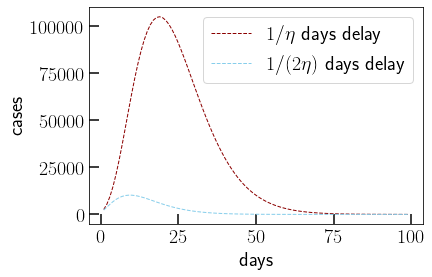

In [283]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
# plt.plot(xdata[:],ydata_UK[:], 'o-', color=coltri[0],  label=r'UK')
plt.plot(xdata, asym_curve(xdata,A0, eta, muA, beta), '--',color=coltri[0], lw=1, label=r'$1/\eta$ days delay')
plt.plot(xdata, asym_curve(xdata,A0, 2*eta, muA, beta), '--',color=coltri[1], lw=1, label=r'$1/(2\eta)$ days delay')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days", fontsize=20)
plt.ylabel(r"cases", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
# plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [3]:
def fitExp(t, a, b, c):
    return a*np.exp(b*t) + c

def fitPowerlaw(t, a, b, c):
    return a*t**(b) + c

def fitAlgebraic(t, a, b, c):
    return a*t + b*t**(2) 

In [5]:
data = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-03-14.csv',sep=';') 

In [6]:
data.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,11/03/2020,Afghanistan,3,0,AF,NaN,Non-EU/EEA
1,08/03/2020,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,02/03/2020,Afghanistan,0,0,AF,NaN,Non-EU/EEA
3,01/03/2020,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,29/02/2020,Afghanistan,0,0,AF,NaN,Non-EU/EEA


In [7]:
data[['CountryExp','NewConfCases']]

,CountryExp,NewConfCases
0,Afghanistan,3
1,Afghanistan,3
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
...,...,...
4996,Vietnam,0
4997,Vietnam,0
4998,Vietnam,0
4999,Vietnam,0


In [8]:
england = data[data.CountryExp =='United Kingdom']
england

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
4780,14/03/2020,United Kingdom,117,0,UK,NaN,Former EU
4781,13/03/2020,United Kingdom,134,4,UK,NaN,Former EU
4783,11/03/2020,United Kingdom,52,1,UK,NaN,Former EU
4784,10/03/2020,United Kingdom,48,2,UK,NaN,Former EU
4785,09/03/2020,United Kingdom,67,1,UK,NaN,Former EU
...,...,...,...,...,...,...,...
4850,04/01/2020,United Kingdom,0,0,UK,NaN,Former EU
4851,03/01/2020,United Kingdom,0,0,UK,NaN,Former EU
4852,02/01/2020,United Kingdom,0,0,UK,NaN,Former EU
4853,01/01/2020,United Kingdom,0,0,UK,NaN,Former EU


In [9]:
newcases_UK = np.flip(england.NewConfCases.to_numpy()[:21])

In [10]:
ydata_UK = np.cumsum(newcases_UK)
t = np.arange(1,len(ydata_UK)+1,1)
xdata = t
xdata,ydata_UK

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  0,   0,   4,   4,   4,   4,   7,   9,  14,  27,  31,  42,  76,
        106, 154, 197, 264, 312, 364, 498, 615]))

In [13]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

# func = fitAlgebraic
# func = fitPowerlaw
func = fitExp

popt_UK, pcov_UK = curve_fit(func, xdata[5:], ydata_UK[5:]+1, x0,maxfev = 5000)

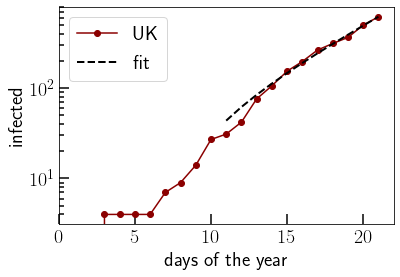

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata[:],ydata_UK[:], 'o-', color=coltri[0],  label=r'UK')
plt.plot(xdata[10:], func(xdata, *popt_UK)[10:], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days of the year", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [16]:
func(np.arange(1,30), *popt_UK)

array([-2.32109803e+01, -2.10925639e+01, -1.84665855e+01, -1.52114359e+01,
       -1.11763688e+01, -6.17451980e+00,  2.57471863e-02,  7.71156708e+00,
        1.72388709e+01,  2.90488691e+01,  4.36884836e+01,  6.18356765e+01,
        8.43308459e+01,  1.12215745e+02,  1.46781727e+02,  1.89629544e+02,
        2.42743484e+02,  3.08583258e+02,  3.90197913e+02,  4.91367029e+02,
        6.16775759e+02,  7.72231793e+02,  9.64934314e+02,  1.20380739e+03,
        1.49991327e+03,  1.86696462e+03,  2.32195965e+03,  2.88596920e+03,
        3.58511262e+03])

In [17]:
italy = data[data.CountryExp =='Italy']

In [18]:
italy

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
2447,14/03/2020,Italy,2547,252,IT,NaN,EU
2448,13/03/2020,Italy,2651,189,IT,NaN,EU
2449,12/03/2020,Italy,2313,196,IT,NaN,EU
2450,11/03/2020,Italy,977,167,IT,NaN,EU
2451,10/03/2020,Italy,1797,98,IT,NaN,EU
...,...,...,...,...,...,...,...
2517,04/01/2020,Italy,0,0,IT,NaN,EU
2518,03/01/2020,Italy,0,0,IT,NaN,EU
2519,02/01/2020,Italy,0,0,IT,NaN,EU
2520,01/01/2020,Italy,0,0,IT,NaN,EU


In [19]:
# cases_it[["DateRep", "NewConfCases"]].to_numpy()
newcases_IT = np.flip(italy.NewConfCases.to_numpy()[:21])

In [20]:
newcases_IT

array([  62,   53,   97,   93,   78,  250,  238,  240,  561,  146,  667,
        587,  769,  778, 1247, 1492, 1797,  977, 2313, 2651, 2547])

In [21]:
ydata_IT = np.cumsum(newcases_IT)
t = np.arange(1,len(ydata_IT)+1,1)
xdata = t
xdata,ydata_IT

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([   62,   115,   212,   305,   383,   633,   871,  1111,  1672,
         1818,  2485,  3072,  3841,  4619,  5866,  7358,  9155, 10132,
        12445, 15096, 17643]))

In [22]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

# func = fitAlgebraic
# func = fitPowerlaw
func = fitExp

popt_IT, pcov_IT = curve_fit(func, xdata[:], ydata_IT[:]+1, x0,maxfev = 5000)
A_IT, B_IT, C_IT = popt_IT[0], popt_IT[1], popt_IT[2]
x_IT = np.array([A_IT, B_IT, C_IT])
curve_IT = func(t, A_IT, B_IT, C_IT)
x_IT,curve_IT

(array([ 4.94194735e+02,  1.72755669e-01, -7.23353819e+02]),
 array([ -135.9659842 ,   -25.1989333 ,   106.45608775,   262.9380418 ,
          448.92868421,   669.99263547,   932.7438681 ,  1245.04358884,
         1616.23543674,  2057.42503377,  2581.81225193,  3205.08613786,
         3945.89431058,  4826.40087624,  5872.94955203,  7116.8518391 ,
         8595.32382569, 10352.59964861, 12441.25492638, 14923.77975968,
        17874.44836139]))

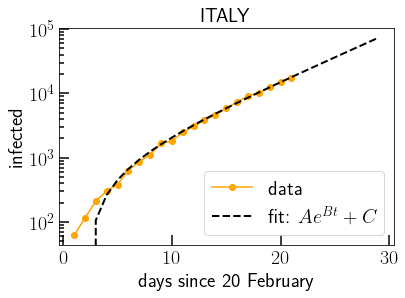

In [23]:
coltri = ["darkred", "skyblue", "orange"]



fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(60e+6, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")


In [24]:
newdeaths_IT = np.flip(italy.NewDeaths.to_numpy()[:21])
ydata_deaths_IT = np.cumsum(newdeaths_IT)
popt_deaths_IT = curve_fit(func, xdata, ydata_deaths_IT, x0,maxfev = 5000)[0]

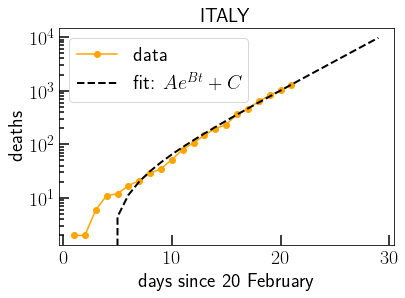

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_deaths_IT, 'o-', color=coltri[2],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_deaths_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"deaths", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [26]:
popt_deaths_IT

array([  6.95815336,   0.24977701, -19.79758495])

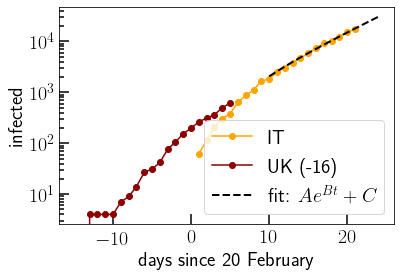

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
# plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (+9)')
plt.plot(xdata-16,ydata_UK, 'o-', color=coltri[0],  label=r'UK (-16)')


plt.plot(np.arange(10,25), func(np.arange(10,25), *popt_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [30]:
newdeaths_UK = np.flip(england.NewDeaths.to_numpy()[:21])
ydata_deaths_UK = np.cumsum(newdeaths_UK)
popt_deaths_UK = curve_fit(func, xdata, ydata_deaths_UK, x0,maxfev = 5000)[0]

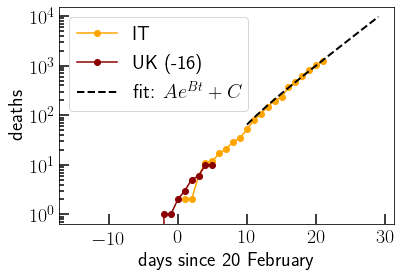

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.hlines(5e+3, 0, 70, colors='k', linestyles='--', label='max') 
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_deaths_IT, 'o-', color=coltri[2],  label=r'IT')
plt.plot(xdata-16,ydata_deaths_UK, 'o-', color=coltri[0],  label=r'UK (-16)')
plt.plot(np.arange(10,30), func(np.arange(10,30), *popt_deaths_IT), '--',color='black', lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"deaths", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
# plt.title('ITALY',fontsize = 20)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [34]:
popt_deaths_IT

array([  6.95815336,   0.24977701, -19.79758495])

In [24]:
germany = data[data.CountryExp =='Germany']
germany

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
1742,13/03/2020,Germany,802,2,DE,NaN,EU
1743,12/03/2020,Germany,271,1,DE,NaN,EU
1744,11/03/2020,Germany,157,0,DE,NaN,EU
1745,10/03/2020,Germany,237,2,DE,NaN,EU
1746,09/03/2020,Germany,55,0,DE,NaN,EU
...,...,...,...,...,...,...,...
1811,04/01/2020,Germany,0,0,DE,NaN,EU
1812,03/01/2020,Germany,0,0,DE,NaN,EU
1813,02/01/2020,Germany,0,0,DE,NaN,EU
1814,01/01/2020,Germany,0,0,DE,NaN,EU


In [25]:
newcases_DE = np.flip(germany.NewConfCases.to_numpy()[:21])
newcases_DE

array([  0,   0,   0,   0,   2,   4,  26,  10,  54,  18,  28,  39,  66,
       138, 284, 163,  55, 237, 157, 271, 802])

In [26]:
ydata_DE = np.cumsum(newcases_DE)
t = np.arange(1,len(ydata_DE)+1,1)
xdata = t
xdata,ydata_DE

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([   0,    0,    0,    0,    2,    6,   32,   42,   96,  114,  142,
         181,  247,  385,  669,  832,  887, 1124, 1281, 1552, 2354]))

In [27]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

func = fitExp
popt_DE, pcov_DE = curve_fit(func, xdata, ydata_DE, x0,maxfev = 5000)
A_DE, B_DE, C_DE = popt_DE[0], popt_DE[1], popt_DE[2]
x_DE = np.array([A_DE, B_DE, C_DE])
curve_DE = fitExp(t, A_DE, B_DE, C_DE)
x_DE,curve_DE

(array([ 19.36277632,   0.22673493, -53.20863493]),
 array([ -28.91808434,  -22.73620484,  -14.98105369,   -5.25223753,
           6.95253606,   22.26339157,   41.47081844,   65.56648357,
          95.79443038,  133.715308  ,  181.28694654,  240.96543859,
         315.83194565,  409.75177652,  527.57395065,  675.38154982,
         860.8057837 , 1093.41998423, 1385.23387043, 1751.3136024 ,
        2210.55963726]))

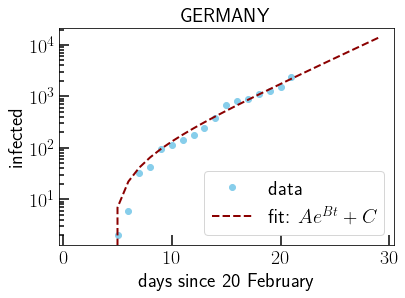

In [28]:

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_DE, 'o', color=coltri[1],  label=r'data')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_DE), '--',color=coltri[0], lw=2, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.yscale('log')
# plt.xscale('log')
plt.title('GERMANY',fontsize = 20)
plt.show()

In [24]:
func(np.arange(1,30), *popt_DE)


array([-2.89180843e+01, -2.27362048e+01, -1.49810537e+01, -5.25223753e+00,
        6.95253606e+00,  2.22633916e+01,  4.14708184e+01,  6.55664836e+01,
        9.57944304e+01,  1.33715308e+02,  1.81286947e+02,  2.40965439e+02,
        3.15831946e+02,  4.09751777e+02,  5.27573951e+02,  6.75381550e+02,
        8.60805784e+02,  1.09341998e+03,  1.38523387e+03,  1.75131360e+03,
        2.21055964e+03,  2.78668255e+03,  3.50942718e+03,  4.41610837e+03,
        5.55353748e+03,  6.98043922e+03,  8.77048360e+03,  1.10160894e+04,
        1.38331959e+04])

In [31]:
usa = data[data.CountryExp =='United States of America']
usa

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
4761,13/03/2020,United States of America,351,10,US,NaN,Non-EU/EEA
4762,12/03/2020,United States of America,287,2,US,NaN,Non-EU/EEA
4763,11/03/2020,United States of America,271,2,US,NaN,Non-EU/EEA
4764,10/03/2020,United States of America,200,5,US,NaN,Non-EU/EEA
4765,09/03/2020,United States of America,121,4,US,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
4830,04/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA
4831,03/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA
4832,02/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA
4833,01/01/2020,United States of America,0,0,US,NaN,Non-EU/EEA


In [32]:
newcases_US = np.flip(usa.NewConfCases.to_numpy()[:21])
newcases_US

array([ 19,   0,   0,  18,   0,   6,   1,   6,   3,  20,  14,  22,  34,
        74, 105,  95, 121, 200, 271, 287, 351])

In [33]:
ydata_US = np.cumsum(newcases_US)
t = np.arange(1,len(ydata_US)+1,1)
xdata = t
xdata,ydata_US

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  19,   19,   19,   37,   37,   43,   44,   50,   53,   73,   87,
         109,  143,  217,  322,  417,  538,  738, 1009, 1296, 1647]))

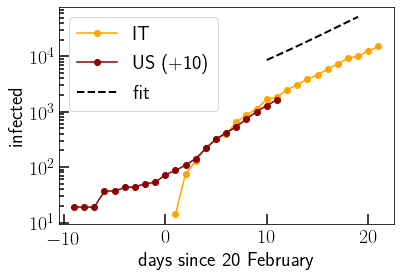

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
# plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (+9)')
plt.plot(xdata-10,ydata_US, 'o-', color=coltri[0],  label=r'US (+10)')


plt.plot(np.arange(10,20), func(np.arange(10,20)+10, 1.10748188e+02,  2.11390555e-01, 1000), '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [35]:
switzerland = data[data.CountryExp =='Switzerland']
switzerland

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
4394,13/03/2020,Switzerland,212,0,CH,NaN,Non-EU/EEA
4395,12/03/2020,Switzerland,152,1,CH,NaN,Non-EU/EEA
4396,11/03/2020,Switzerland,116,1,CH,NaN,Non-EU/EEA
4397,10/03/2020,Switzerland,42,0,CH,NaN,Non-EU/EEA
4398,09/03/2020,Switzerland,68,1,CH,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
4463,04/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA
4464,03/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA
4465,02/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA
4466,01/01/2020,Switzerland,0,0,CH,NaN,Non-EU/EEA


In [36]:
newcases_CH = np.flip(switzerland.NewConfCases.to_numpy()[:21])
newcases_CH

array([  0,   0,   0,   0,   1,   0,   7,   4,   6,   6,   6,   7,  20,
        30, 122,  55,  68,  42, 116, 152, 212])

In [37]:
ydata_CH = np.cumsum(newcases_CH)
t = np.arange(1,len(ydata_CH)+1,1)
xdata = t
xdata,ydata_CH

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  0,   0,   0,   0,   1,   1,   8,  12,  18,  24,  30,  37,  57,
         87, 209, 264, 332, 374, 490, 642, 854]))

In [38]:
popt_IT

array([ 3.63951274e+02,  1.79342096e-01, -5.72145652e+02])

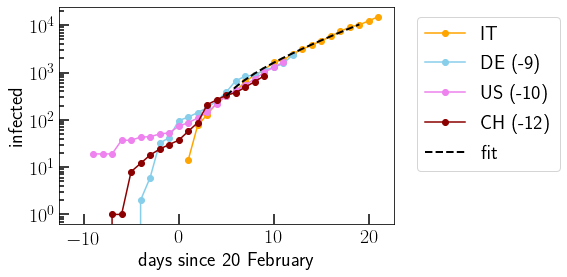

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata_IT, 'o-', color=coltri[2],  label=r'IT')
plt.plot(xdata-9,ydata_DE, 'o-', color=coltri[1],  label=r'DE (-9)')
plt.plot(xdata-10,ydata_US, 'o-', color='violet',  label=r'US (-10)')
plt.plot(xdata-12,ydata_CH, 'o-', color=coltri[0],  label=r'CH (-12)')


plt.plot(np.arange(5,20), func(np.arange(5,20), *popt_IT), '--',color='black', lw=2, label=r'fit')
# plt.legend(loc='best',prop={'size':20},frameon=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 February", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(-100,2600)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [30]:
popt_IT

array([ 2.86061083e+02,  1.82237032e-01, -5.09659404e+02])

In [43]:
japan = data[data.CountryExp =='Japan']
newcases_JP = np.flip(japan.NewConfCases.to_numpy()[:21])
newcases_JP

array([ 9, 12, 27, 12,  0, 20, 22, 24, 20,  9, 15,  0, 14, 49, 32, 59, 47,
       33, 26, 54, 51])

In [89]:
ydata_JP = np.cumsum(newcases_JP)
t = np.arange(1,len(ydata_JP)+1,1)
xdata = t
xdata,ydata_JP

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 array([  9,  21,  48,  60,  60,  80, 102, 126, 146, 155, 170, 170, 184,
        233, 265, 324, 371, 404, 430, 484, 535]))

In [6]:
china = data[data.CountryExp =='China']
china

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
946,13/03/2020,China,22,7,CN,NaN,Non-EU/EEA
947,12/03/2020,China,24,11,CN,NaN,Non-EU/EEA
948,11/03/2020,China,29,22,CN,NaN,Non-EU/EEA
949,10/03/2020,China,20,17,CN,NaN,Non-EU/EEA
950,09/03/2020,China,45,23,CN,NaN,Non-EU/EEA
...,...,...,...,...,...,...,...
1015,04/01/2020,China,0,0,CN,NaN,Non-EU/EEA
1016,03/01/2020,China,17,0,CN,NaN,Non-EU/EEA
1017,02/01/2020,China,0,0,CN,NaN,Non-EU/EEA
1018,01/01/2020,China,0,0,CN,NaN,Non-EU/EEA


In [7]:
newcases_CN = np.flip(china.NewConfCases.to_numpy())
newcases_CN

array([   27,     0,     0,    17,     0,    15,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     4,
          17,   136,    19,   151,   140,    97,   259,   441,   665,
         787,  1753,  1466,  1740,  1980,  2095,  2590,  2812,  3237,
        3872,  3727,  3160,  3418,  2607,  2974,  2490,  2028, 15141,
        4156,  2538,  2007,  2052,  1890,  1750,   394,   891,   826,
         647,   218,   515,   410,   439,   329,   428,   574,   205,
         127,   119,   117,   170,   101,    46,    45,    20,    29,
          24,    22])

In [8]:
ydata_CN = np.cumsum(newcases_CN)[20:50]
# ydata_CN = np.cumsum(newcases_CN)[20:]
xdata_CN = np.arange(1,len(ydata_CN)+1,1)
xdata_CN,ydata_CN

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([  235,   386,   526,   623,   882,  1323,  1988,  2775,  4528,
         5994,  7734,  9714, 11809, 14399, 17211, 20448, 24320, 28047,
        31207, 34625, 37232, 40206, 42696, 44724, 59865, 64021, 66559,
        68566, 70618, 72508]))

/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


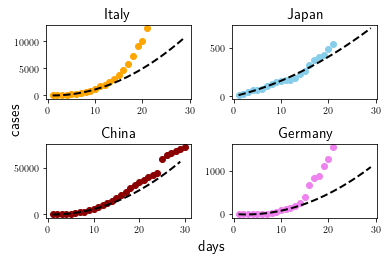

In [109]:
func = fitAlgebraic
# func = fitPowerlaw
# func = fitExp

popt_IT, pcov_IT = curve_fit(func, xdata[:10], ydata_IT[:10], x0,maxfev = 5000)
popt_DE, pcov_DE = curve_fit(func, xdata[:10], ydata_DE[:10], x0,maxfev = 5000)
popt_JP, pcov_JP = curve_fit(func, xdata[:10], ydata_JP[:10], x0,maxfev = 5000)
popt_CN, pcov_CN = curve_fit(func, xdata_CN[:10], ydata_CN[:10], x0,maxfev = 5000)

fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.plot(xdata,ydata_IT, 'o', color=coltri[2],  label=r'IT')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_IT), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Italy',fontsize = 15)
ax2 = fig.add_subplot(222)
plt.plot(xdata,ydata_JP, 'o', color=coltri[1],  label=r'JP')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_JP), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Japan',fontsize = 15)
ax3 = fig.add_subplot(223)
plt.plot(xdata_CN,ydata_CN, 'o', color=coltri[0],  label=r'CN')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_CN), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('China',fontsize = 15)
ax4 = fig.add_subplot(224)
plt.plot(xdata,ydata_DE, 'o', color='violet',  label=r'DE')
plt.plot(np.arange(1,30), func(np.arange(1,30), *popt_DE), '--',color='black', lw=2, label=r'fit: $At + Bt^2$')
plt.title('Germany',fontsize = 15)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r"days",fontsize = 15)
plt.ylabel(r"cases",fontsize = 15)
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.yscale('log')
# plt.xscale('log')
# plt.legend(loc='best',prop={'size':20},frameon=True)
# ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
# ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
fig.tight_layout(pad=1.0)
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")

In [61]:
date_CN = np.flip(china.DateRep)[20:]

979    20/01/2020
978    21/01/2020
977    22/01/2020
976    23/01/2020
975    24/01/2020
974    25/01/2020
973    26/01/2020
972    27/01/2020
971    28/01/2020
970    29/01/2020
969    30/01/2020
968    31/01/2020
967    01/02/2020
966    02/02/2020
965    03/02/2020
964    04/02/2020
963    05/02/2020
962    06/02/2020
961    07/02/2020
960    08/02/2020
959    09/02/2020
958    10/02/2020
957    11/02/2020
956    12/02/2020
955    13/02/2020
954    14/02/2020
953    15/02/2020
952    16/02/2020
951    17/02/2020
950    18/02/2020
949    19/02/2020
948    20/02/2020
947    21/02/2020
946    22/02/2020
945    23/02/2020
944    24/02/2020
943    25/02/2020
942    26/02/2020
941    27/02/2020
940    28/02/2020
939    29/02/2020
938    01/03/2020
937    02/03/2020
936    03/03/2020
935    04/03/2020
934    05/03/2020
933    06/03/2020
932    07/03/2020
931    08/03/2020
930    09/03/2020
929    10/03/2020
928    11/03/2020
927    12/03/2020
Name: DateRep, dtype: object

In [72]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

func = fitExp
# func = fitPowerlaw

popt_CN, pcov_CN = curve_fit(func, xdata[:20], ydata_CN[:20], x0,maxfev = 5000)
popt_CN, pcov_CN

(array([ 3.04960181e+03,  1.29702824e-01, -4.58457153e+03]),
 array([[ 2.88766620e+05, -4.38189512e+00, -4.90715393e+05],
        [-4.38189512e+00,  6.72092111e-05,  7.28637003e+00],
        [-4.90715393e+05,  7.28637003e+00,  9.09852306e+05]]))

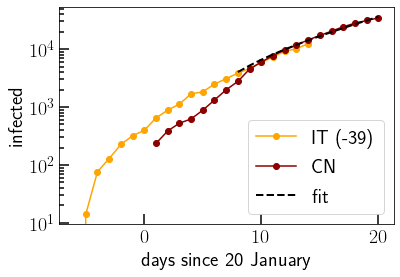

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata[:20],ydata_CN[:20], 'o-', color=coltri[0],  label=r'CN')
plt.plot(xdata[7:20], func(xdata, *popt_CN)[7:20], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days since 20 January", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [9]:
ydata_CN = np.cumsum(newcases_CN)[:]
# ydata_CN = np.cumsum(newcases_CN)[20:]
xdata_CN = np.arange(1,len(ydata_CN)+1,1)
xdata_CN,ydata_CN

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74]),
 array([   27,    27,    27,    44,    44,    59,    59,    59,    59,
           59,    59,    59,    59,    59,    59,    59,    59,    63,
           80,   216,   235,   386,   526,   623,   882,  1323,  1988,
         2775,  4528,  5994,  7734,  9714, 11809, 14399, 17211, 20448,
        24320, 28047, 31207, 34625, 37232, 40206, 42696, 44724, 59865,
        64021, 66559, 68566, 70618, 72508, 74258, 74652, 75543, 76369,
        77016, 77234, 77749, 78159, 78598, 78927, 79355, 79929, 80134,
        80261, 80380, 80497, 80667, 80768, 80814, 80859, 80879, 80908,
        80932, 80954]))

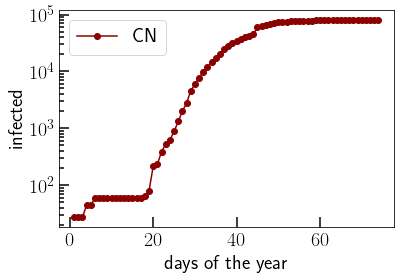

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
# plt.plot(np.arange(1,len(ydata_IT)+1,1)-7,ydata_IT, 'o-', color=coltri[2],  label=r'IT (-39)')
plt.plot(xdata_CN[:],ydata_CN[:], 'o-', color=coltri[0],  label=r'CN')
# plt.plot(xdata[7:20], func(xdata, *popt_CN)[7:20], '--',color='black', lw=2, label=r'fit')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"days of the year", fontsize=20)
plt.ylabel(r"infected", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.ylim(10,10000)
plt.yscale('log')
# plt.xscale('log')
plt.title('',fontsize = 25)
plt.show()

In [ ]:
folder = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
data = pd.read_csv(folder+'time_series_19-covid-Confirmed.csv',sep=',') 
data.rename(columns={'Province/State': 'State', 'Country/Region': 'Country'}, inplace=True)
italy = data[data.Country =='Italy']
italy